# **Introduction to Regression with Neural Networks in TensorFlow**

There are many definitions for a regression problem but in out case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter ..... predicting number.

In [ ]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.12.0


##**Create data to view and fit**

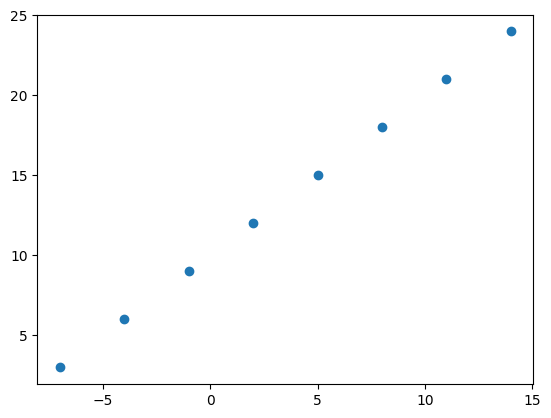

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt

# Create features
X=np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])

#Create labels
y=np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])

#Visualize it
plt.scatter(X,y)

In [ ]:
y == X+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## **Input and output shapes**

In [ ]:
# Create a demo tensor for our housing price prediction problem
house_info=tf.constant(["bedroom","bathroom","garage"])
house_price=tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
X[0],y[0]

(-7.0, 3.0)

In [ ]:
X[1],y[1]

(-4.0, 6.0)

In [ ]:
input_shape=X.shape
output_shape=y.shape
input_shape,output_shape

((8,), (8,))

In [ ]:
X[0].ndim

0

In [ ]:
#Turn our NumPy arrays into tensors
X= tf.constant(X)
y=tf.constant(y)
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
input_shape=X[0].shape
output_shape=y[0].shape
input_shape,output_shape

(TensorShape([]), TensorShape([]))

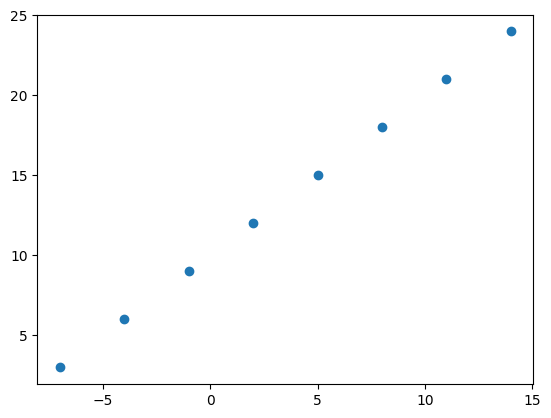

In [ ]:
plt.scatter(X,y)

## **Steps in modelling with TensorFlow**

1. **Creating a model**- define the input and output layers, as well as the hidden layers of a deep learning models.
2. **Compiling a model** - define the loss function ( in other words, the function which tells our model how wrong it is) and the optimizer ( tells our model how to improve patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model try to find patterns between X & y ( features and labels)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1.Create a model using the Sequential API
model = tf.keras.Sequential([       #
    tf.keras.layers.Dense(1)
]) 

#2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mean absolute error
              optimizer=tf.keras.optimizers.SGD(), #Stochastic Gradient Descent
              metrics=["mae"]) 

# 3. Fit the model
model.fit(tf.expand_dims(X,axis=1),y,epochs=5)  #epochs are the oppurtunities to go through the model 

Epoch 1/5
1/1 [==============================] - 1s 682ms/step - loss: 10.9141 - mae: 10.9141
Epoch 2/5
1/1 [==============================] - 0s 13ms/step - loss: 10.7816 - mae: 10.7816
Epoch 3/5
1/1 [==============================] - 0s 12ms/step - loss: 10.6491 - mae: 10.6491
Epoch 4/5
1/1 [==============================] - 0s 13ms/step - loss: 10.5166 - mae: 10.5166
Epoch 5/5
1/1 [==============================] - 0s 13ms/step - loss: 10.3841 - mae: 10.3841


In [ ]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
# Try and make a prediction using out model
ypred=model.predict([17.0])
ypred

1/1 [==============================] - 0s 108ms/step


array([[15.585072]], dtype=float32)

## **Improving the model**

We can improve our model, by altering the steps we took to create a model.

1. **Creating a Model** - here we might add more layers, increase the number of hidden units(also called neurons) within each of the hidden layers, change the activation function of each layer.
2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function 
3. **Fitting a model** - here we might fit a model for more **epochs** (leave it traininig for longer) or on more data (give the model more examples)

In [ ]:
#Let's rebuild our model

# 1. Create the model 
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae']
              )
# 3. Fit the model ( this time we'll train for longer)
model.fit(tf.expand_dims(X,axis=1), y, epochs=100)



Epoch 1/100
1/1 [==============================] - 0s 357ms/step - loss: 17.9467 - mae: 17.9467
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 17.6654 - mae: 17.6654
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 17.3842 - mae: 17.3842
Epoch 4/100
1/1 [==============================] - 0s 17ms/step - loss: 17.1029 - mae: 17.1029
Epoch 5/100
1/1 [==============================] - 0s 20ms/step - loss: 16.8217 - mae: 16.8217
Epoch 6/100
1/1 [==============================] - 0s 12ms/step - loss: 16.5404 - mae: 16.5404
Epoch 7/100
1/1 [==============================] - 0s 15ms/step - loss: 16.2592 - mae: 16.2592
Epoch 8/100
1/1 [==============================] - 0s 12ms/step - loss: 15.9779 - mae: 15.9779
Epoch 9/100
1/1 [==============================] - 0s 12ms/step - loss: 15.6967 - mae: 15.6967
Epoch 10/100
1/1 [==============================] - 0s 17ms/step - loss: 15.4154 - mae: 15.4154
Epoch 11/100
1/1 [==============================

In [ ]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
# Let's see if our model's prediction has improved
model.predict([17.0])

1/1 [==============================] - 0s 138ms/step


array([[29.59016]], dtype=float32)

In [ ]:
#Let's see if we can make another change to improve our model

#1. Create the model (this time withh an extra hidden layer with 100 hidden units)
model=tf.keras.Sequential([
    tf.keras.layers.Dense(50,activation=None),
    tf.keras.layers.Dense(50,activation=None),
    tf.keras.layers.Dense(50,activation=None),
    tf.keras.layers.Dense(50,activation=None),
    tf.keras.layers.Dense(1)

])
#2.Compile the model
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=['mae'])

#3. Fit the model
model.fit(tf.expand_dims(X,axis=1),y , epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 13.3768 - mae: 13.3768
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 12.5128 - mae: 12.5128
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 11.6332 - mae: 11.6332
Epoch 4/100
1/1 [==============================] - 0s 14ms/step - loss: 10.7257 - mae: 10.7257
Epoch 5/100
1/1 [==============================] - 0s 15ms/step - loss: 9.7789 - mae: 9.7789
Epoch 6/100
1/1 [==============================] - 0s 12ms/step - loss: 8.7832 - mae: 8.7832
Epoch 7/100
1/1 [==============================] - 0s 14ms/step - loss: 7.7286 - mae: 7.7286
Epoch 8/100
1/1 [==============================] - 0s 13ms/step - loss: 7.2796 - mae: 7.2796
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 7.8173 - mae: 7.8173
Epoch 10/100
1/1 [==============================] - 0s 12ms/step - loss: 8.1174 - mae: 8.1174
Epoch 11/100
1/1 [==============================] - 0s 12ms/ste

In [ ]:
model.predict([17.0])

1/1 [==============================] - 0s 357ms/step


array([[25.504215]], dtype=float32)

#**Evaluating a model**

In practice, a typical workflow you'lll go through when building neural network is:
 
```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it-> evaluate it......
```

When it comes to evaluation ... there are 3 words you should memorize:

>  "Visualize, visualize visualize"

It's a good idea to visualize:
* The data - what data are we working with? What does it look like?
* The model itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how do the predictions of a model line up against the ground truth (the original labels)?.

In [ ]:
# Make a bigger dataset
X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
# Make labels for the dataset
y = X +10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

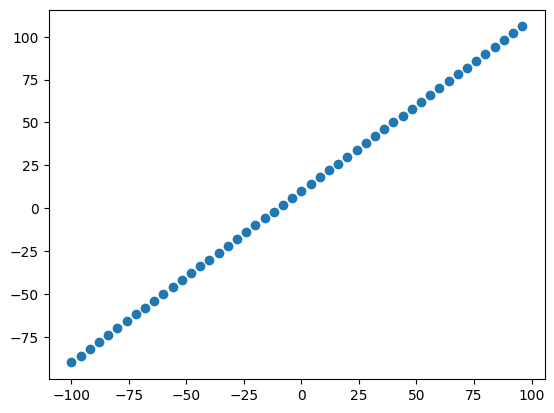

In [ ]:
# Visualize the data 
import matplotlib.pyplot as plt
plt.scatter(X,y)

### The 3 sets....
* Training set - the model learns from this data, which is typically 70-80% of the data you have available.
* Validation set - the model gets tuned on this data, which is typically 10-15% of the data available. 
* Test set - the model gets evaluated on this data to test what is has learned, this set is typically 10-15% of the total data available.

``Generalization -  The ability for a machine learning model to perform well on data it hasn't seen before`` 


In [ ]:
# Check the length of how many samples we have
len(X)

50

In [ ]:
# Split the data into train and tes sets
X_train = X[:40] #first 40 training samples (80% of the data)
y_train = y[:40]

X_test = X[40:] #last 10 testing samples (20% of the data)
y_test = y[40:]
len(X_train), len(X_test) , len(y_train),len(y_test)


(40, 10, 40, 10)

### **Visualizing the data**
Now we've got our data in training and test sets... let's visualize it again !

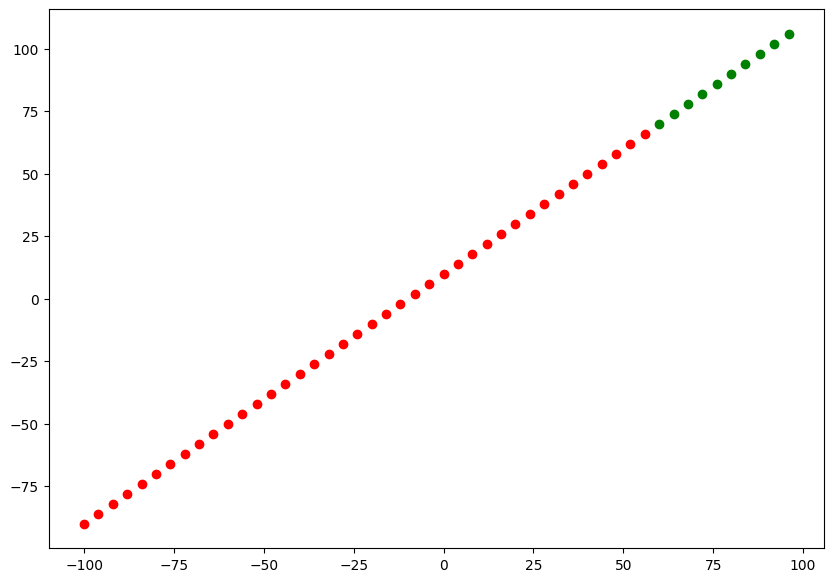

In [ ]:
plt.figure(figsize=(10,7))
#plot training data in blue
plt.scatter(X_train,y_train,c='r',label="Training data")
# Plot test data in green
plt.scatter(X_test,y_test,c='g',label="Testing data")

In [ ]:
 # Let's have a look at how to build a neural netwoek for our data

#1. Create a model 
 model= tf.keras.Sequential([
     tf.keras.layers.Dense(1)
 ])

#2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
# model.fit(tf.expand_dims(X_train,axis=1),y_train,epochs=100)

## Visualizing the model

In [ ]:
model.build()

ValueError: ignored

In [ ]:
model.summary()

ValueError: ignored

In [ ]:
#Let's create a model which builds automatically by defining the input_shape argument
tf.random.set_seed(42)
#Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10,input_shape=[1],name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="model_1")

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# model.fit(tf.expand_dims(X))

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


* Total params - total number of parameters in model.

* Trainable parameters - these are the parameters (patterns) the model can update it trains.

* Non-trainable params - these parameters aren't updated during training (this is typical when you bring in already learn patterns or parameters from other models during **transfer learning**).


In [ ]:
# Let's fit our model to the training data
model.fit(tf.expand_dims(X_train,axis=1), y_train,epochs=100,verbose=0)

In [ ]:
# Get a summary of our model
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


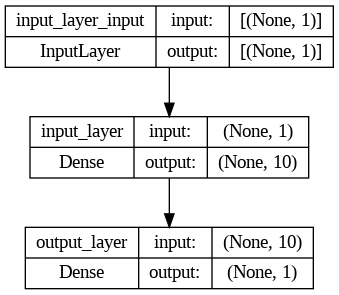

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model=model, show_shapes=True)

### Visualizing our model's prediction

To visualize predictions, it's a good idea to plot them against the ground truth labels.
 
 Often you'll see this in form of `y_test` or `y_true` versus `y_pred` (ground truth versus model's predictions)

In [ ]:
#Make some predictions
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 57ms/step


array([[ 76.856544],
       [ 81.8685  ],
       [ 86.880455],
       [ 91.89242 ],
       [ 96.90436 ],
       [101.916306],
       [106.92825 ],
       [111.94022 ],
       [116.95217 ],
       [121.96412 ]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

🔑**Note:** If you feel like you're going to reuse some kind of functionality in the future, it's a good idea to turn it into a function.

In [ ]:
# Let's create a plotting function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """
  Plots training data, test data and compares predictions to ground truth labels
  """
  plt.figure(figsize=(10,7))
  plt.scatter(train_data,train_labels,c="b",label="Training data")
  #Plot testing data in green
  plt.scatter(test_data,test_labels, c="g",label="Testing data")
  #Plot model's predictions in red
  plt.scatter(test_data, predictions,c="r", label="Predictions")
  plt.legend()

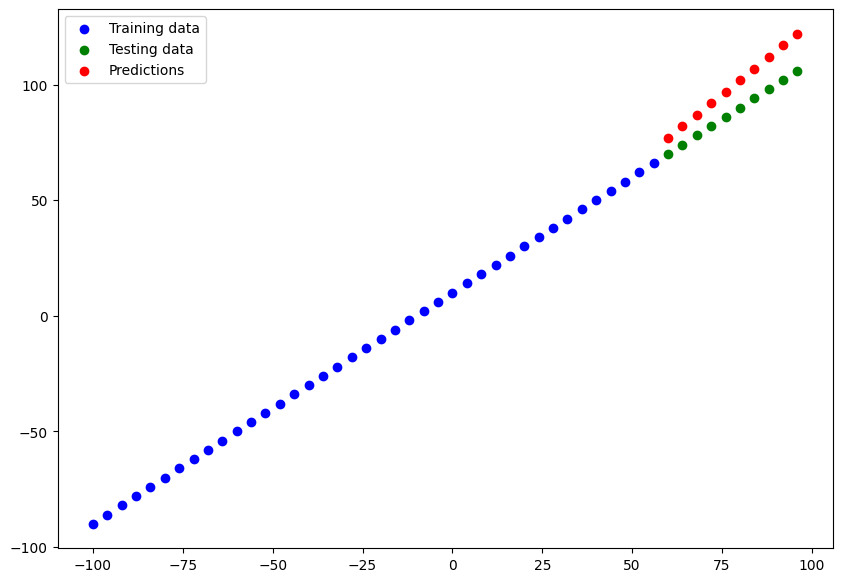

In [ ]:
plot_predictions(train_data=X_train,
                          train_labels=y_train,
                          test_data=X_test,
                          test_labels=y_test,
                          predictions=y_pred)

### Evaluating our model's predictions with regression evaluatino metrics

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance

Since we're working on a regression, two of the main metrics:
* MAE - mean absolute error, "on average, how wrong is each of the model's prediction"
* MSE - mean square error, "square the average errors"


In [ ]:
#Evaluate the model on the test 
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 170ms/step - loss: 11.4103 - mae: 11.4103


[11.410337448120117, 11.410337448120117]

## MAE - As a great started metric for any regression problem

In [ ]:
#Calculate the mean absolute error
mae=tf.metrics.mean_absolute_error(y_true=y_test,
                                   y_pred=y_pred)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([13.086073 , 10.8526   , 10.       , 10.378484 , 11.961743 ,
       14.7497835, 18.928253 , 23.940224 , 28.952173 , 33.96412  ],
      dtype=float32)>

In [ ]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 76.856544],
       [ 81.8685  ],
       [ 86.880455],
       [ 91.89242 ],
       [ 96.90436 ],
       [101.916306],
       [106.92825 ],
       [111.94022 ],
       [116.95217 ],
       [121.96412 ]], dtype=float32)>

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 76.856544,  81.8685  ,  86.880455,  91.89242 ,  96.90436 ,
       101.916306, 106.92825 , 111.94022 , 116.95217 , 121.96412 ],
      dtype=float32)>

In [ ]:
#Calculate the mean absolute error
mae_error=tf.metrics.mean_absolute_error(y_true=y_test,y_pred=tf.squeeze(y_pred))
mae_error

<tf.Tensor: shape=(), dtype=float32, numpy=11.410335>

# Mean Square Error
* When a larger errors are more significant than smaller errors.

In [ ]:
tf.keras.losses.MSE(y_test,tf.squeeze(y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=138.64413>

In [ ]:
tf.metrics.mean_squared_error(y_true=y_test,y_pred=tf.squeeze(y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=138.64413>

In [ ]:
# Make some functions to reuse MAE and MSE
def mae(y_true,y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true,y_pred=tf.squeeze(y_pred))

def mse(y_true,y_pred):
  return tf.metrics.mean_squared_error(y_true=y_true,y_pred=tf.squeeze(y_pred))


### **Running experiments to improve our model**

```
Build a model -> fit it -> evaluate it -> tweak it -> fit it-> evaluate it -> tweak it -> evaluate it.... 
```

1. Get more data - get more examples for your model to train on (more oppurtunities to learn patterns or relationships between features and labels).
2. Make you  model larger (using a more complex model) - this might come in the form of more layers or more hidden units in each layer.
3. Train for longer - Give your model more of a chance to find patterns in the data.

Let's do 3 modelling experiments: 

1. `model_1` - same as the original model, 1 layer, trained for 100 epochs.
2. ` model_2` - 2 layers trained for 100 epochs.
3. `model_3` - 2 layers trained for 500 epochs.
4. 
5. 

**Build `model_1`:**

In [ ]:
X_train,y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

In [ ]:
#Set random seed
tf.random.set_seed(42)

#1. Create the model
model_1 = tf.keras.Sequential(
    tf.keras.layers.Dense(1)
)
#2. Compile 
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])
#3. Fit the model
model_1.fit(tf.expand_dims(X_train,axis=1),y_train,epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 13ms/step - loss: 102.1179 - mae: 102.1179
Epoch 2/100
2/2 [==============================] - 0s 9ms/step - loss: 66.6624 - mae: 66.6624
Epoch 3/100
2/2 [==============================] - 0s 9ms/step - loss: 29.3697 - mae: 29.3697
Epoch 4/100
2/2 [==============================] - 0s 9ms/step - loss: 10.2855 - mae: 10.2855
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 11.2989 - mae: 11.2989
Epoch 6/100
2/2 [==============================] - 0s 9ms/step - loss: 10.4300 - mae: 10.4300
Epoch 7/100
2/2 [==============================] - 0s 9ms/step - loss: 9.4100 - mae: 9.4100
Epoch 8/100
2/2 [==============================] - 0s 8ms/step - loss: 9.2853 - mae: 9.2853
Epoch 9/100
2/2 [==============================] - 0s 9ms/step - loss: 11.9847 - mae: 11.9847
Epoch 10/100
2/2 [==============================] - 0s 10ms/step - loss: 13.9491 - mae: 13.9491
Epoch 11/100
2/2 [==============================] - 0s 11ms

In [ ]:
#Make and plot predictions for model_1
y_pred_1 = model_1.predict(X_test)
plot_predictions(predictions=y_pred_1)

In [ ]:
# Calculate model_1 evaluation metrics
mae_1 =mae(y_test,y_pred_1)
mse_1=mse(y_test,y_pred_1)
mae_1,mse_1

### Model_2

* 2 Dense layers, trained for 100 epochs

In [ ]:
tf.random.set_seed(42)
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mse'])
model_2.fit(tf.expand_dims(X_train,axis=1),y_train,epochs=100)

In [ ]:
# Plot the graph
y_pred_2= model_2.predict(X_test)
plot_predictions(predictions=y_pred_2)

In [ ]:
#Calculate model_2 evaluation metrics
mae_2=mae(y_test,y_pred_2)
mse_2=mse(y_test,y_pred_2)
mae_2,mse_2

In [ ]:
print("Model 1:")
print('mae 1: ',mae_1)
print('mse 1: ',mse_1)
print("\nModel 2:")
print('mae 2: ',mae_2)
print('mse 2: ',mse_2)


### Build Model 3

* 2 layers trained for 500 epochs

In [ ]:
tf.random.set_seed(42)
model_3=tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])
model_3.fit(tf.expand_dims(X_train,axis=1),y_train,epochs=500)

In [ ]:
#Plot the graph
y_pred_3=model_3.predict(X_test)
plot_predictions(predictions=y_pred_3)

In [ ]:
#Calculate the evaluation metrics
mae_3=mae(y_test,y_pred_3)
mse_3=mse(y_test,y_pred_3)
mae_3,mse_3

🔑**Note :**  You want to start with small experiments (small models) and make sure they work and then increase their scale when necessary.

### **Comparing the results of our Experiments**
We've run a few experiments, let's compare the results.

In [ ]:
# Let's compare our model's results using a pandas dataframe
import pandas as pd

model_results=[["model_1", mae_1.numpy(), mse_1.numpy()],
               ["model_2", mae_2.numpy(), mse_2.numpy()],
               ["model_3", mae_3.numpy(), mse_3.numpy()]]

all_results=pd.DataFrame(model_results, columns=["model","mae","mse"])
all_results
                           

Looks like `model_2` performed the best

In [ ]:
model_2.summary()

>🔑**Note:**  One of your main goals should be to minimize the timem between your experiments. The more experiments you do, the more things you'll figure out which don't work and in turn, get closer to figuring out what does work. Remember the machine learning parctioner motto: "experiment, experiment, experiment".

## Tracking your experiments
One really good habit in machine learning modelling is to track the results of your experiments.
 
 And when doing so, it can be tedious if you're running lots of experiments

 Luckily, there are tools to help us!
 
📖**Resource:** As you build more models you want to look into using:
* Tensorboard - a component of the Tensorflow library to help track modelling experiments (we'll see this one later).
* Weights & Biases - a tool for tracking all kinds of machine learning experiments (plugs straight into tensorboard).

### Saving our models

Saving our models allows us to use them outside of Google Colab (or wherever they were trained) such as in a web application or mobile app


There are 2 main formats we can save our model's too:

1. The SavedModel format
2. The HDF5 format

In [ ]:
# Save a model using the SavedModel format
model_2.save("best_model_SavedModel_format")

In [ ]:
# Save a model using HDF5 format
model_2.save("best_model_HDF5_format.h5")

## Loading a Saved model

In [ ]:
# Load in the SavedModel format
loaded_SavedModel_format=tf.keras.models.load_model('/content/best_model_SavedModel_format')

In [ ]:
loaded_SavedModel_format.summary()

In [ ]:
model_2.summary()


In [ ]:
#Compare model_2 predictions with SavedModel format model predictions
model_2_preds = model_2.predict(X_test)
loaded_SavedModel_format_preds =loaded_SavedModel_format.predict(X_test) 

In [ ]:
model_2_preds == loaded_SavedModel_format_preds

In [ ]:
mae(y_true=y_test,y_pred=model_2_preds) == mae(y_true=y_test,y_pred=loaded_SavedModel_format_preds)

In [ ]:
model_2_preds.squeeze()

In [ ]:
loaded_SavedModel_format_preds.squeeze()

In [ ]:
#Load in a model using the .h5 format
loaded_h5=tf.keras.models.load_model('/content/best_model_HDF5_format.h5')
loaded_h5.summary()

In [ ]:
# Check to see if loaded .h5 model predictions match model_2
model_2_preds= model_2.predict(X_test)
loaded_h5_preds=loaded_h5.predict(X_test)


In [ ]:
model_2_preds == loaded_h5_preds

## **A larger example**

In [ ]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
# Read in the insurance dataset
insurance=pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

In [ ]:
insurance_onehot=pd.get_dummies(insurance)
insurance_onehot

In [ ]:
#Create x & y values(features and labels)
X= insurance_onehot.drop("charges",axis=1)
y=insurance_onehot["charges"]

In [ ]:
#View X
X.head()

In [ ]:
y.head()

In [ ]:
#Create training and test sets
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=42)
len(X),len(X_train),len(X_test)

In [ ]:
#Build a neural network (sort of like model_2 above)
tf.random.set_seed(42)
model=tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

model.fit(tf.expand_dims(X_train,axis=1),y_train,epochs=100)

In [ ]:
#Check the results of the model on the test data
model.evaluate(X_test,y_test)

In [ ]:
y_train.median(),y_train.mean()

Right now it looks like our model isn't performing too well.. let's try and improve it!

To(try) improve our model, we'll run  experiments:

1. Add an extra layer with more hidden units and use the Adam Optimizer
2. Same as above Train for longer 



In [ ]:
tf.random.set_seed(42)
model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
model_2.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['mae'])

model_2.fit(tf.expand_dims(X_train,axis=1),y_train,epochs=100)

In [ ]:
model_2.evaluate(X_test,y_test)

In [ ]:
tf.random.set_seed(42)
model_3=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])
graph=model_3.fit(tf.expand_dims(X_train,axis=1),y_train,epochs=200)

In [ ]:
model_3.evaluate(X_test,y_test)

In [ ]:
model.evaluate(X_test,y_test)

In [ ]:
# Plot history (also known as a loss curve or a training curve)
pd.DataFrame(graph.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

>🤔**Question:** How long should you train for?

It depends. Really ... it depends on the problem you're working on. However, many people have asked this question before.... so TensorFlow has a solution! It's called the [`EarlyStopping Callback` ] which is a TensorFlow component you can add to your model to stop training for a certain metrics.


## Preporcessing data (normalization and standardization)

In terms of scaling values, neural network tend to prefer normalization.

If you're not sure on which to use, you could try both and see which performs better.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

#Read in the insurance dataframe
insurance=pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
insurance

To prepare our data we can borrow a few classess from Scikit-Learn

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
#Create a column transformer
ct=make_column_transformer(
    (MinMaxScaler(),['age','bmi','children']),#turn all values in these columns between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"),["sex","smoker","region"])
)
#Create X & y 
X=insurance.drop("charges",axis=1)
y=insurance["charges"]

# Build our train and test sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

#Fit the column transformer to our training data
ct.fit(X_train)

#Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal=ct.transform(X_train)
X_test_normal=ct.transform(X_test)

In [ ]:
#What does the data look like
X_train.loc[0]

In [ ]:
X_train_normal[0]

In [ ]:
X_train.shape,X_train_normal.shape

Beautiful! Our data has been normalized and one hot encoded. Now let's build a neural network model in it and see

In [ ]:
# Build a neural network model to fit on our normalized data
tf.random.set_seed(42)

#1.Create the model
insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#2. Compile the model
insurance_model_4.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['mae']
)

#3. Fit the model
insurance_model_4.fit(tf.expand_dims(X_train_normal,axis=1),y_train,epochs=100)

In [ ]:
# Evaluate our insurance model trained on normalized data
insurance_model_4.evaluate(X_test_normal,y_test)